# Lab 2 Basic algorithms for unsupervised learning and text data processing (Scikit-learn lib)

## Task 1 Dimensionality reduction and data visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Preparation of the dataset (from Lab1)

In [2]:
df_laptops = pd.read_csv("laptops.csv")

In [3]:
df_laptops.head()

name  price_eur  display_inch  \
0             Apple MacBook Air M1 256GB, Space grau     912.99          13.0   
1  MSI Stealth 17 Studio A13VI-013 - Intel Core i...    4680.23          17.3   
2  MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...    1651.12          14.0   
3   Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz    1087.38          15.6   
4  Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...     354.97          15.6   

   display_cm display_resolution display_ratio  weight_kg  height_mm  \
0        33.8          2560x1600          16:9       1.29       16.1   
1        43.9          3840x2160          16:9       2.80       20.1   
2        35.6          2880x1800           NaN       1.60       17.9   
3         NaN                NaN           NaN        NaN        NaN   
4        39.6          1920x1080           NaN       1.95       23.9   

   width_mm  depth_mm  ... keyboard_backlit keyboard_numpad  has_webcam  \
0     304.1     212.4  ...             True           False        True   
1     397.6     283.5  ...             True            True        True   
2     314.0     227.5  ...             True           False        True   
3       NaN       NaN  ...            False           False       False   
4     361.0     244.0  ...            False            True        True   

  has_bluetooth bluetooth_version        wifi_standard   product_ean  \
0          True               5.0   Wi-Fi 6 (802.11ax)  1.942521e+11   
1          True               5.3  Wi-Fi 6E (802.11ax)  4.711377e+12   
2          True               5.2  Wi-Fi 6E (802.11ax)  4.719073e+12   
3         False               NaN                  NaN  4.719332e+12   
4          True               5.1  Wi-Fi 6E (802.11ax)  4.065221e+12   

              product_sku  release_year   category  
0                MGN63D/A        2020.0  Notebooks  
1              0017P2-013           NaN  Notebooks  
2              0014F1-049           NaN  Notebooks  
3  AORUS 15 9KF-E3DE383SH           NaN  Notebooks  
4              FPC04902BS           NaN  Notebooks  

[5 rows x 33 columns]

In [4]:
df_laptops.keys()

Index(['name', 'price_eur', 'display_inch', 'display_cm', 'display_resolution',
       'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'operating_system', 'cpu_processor', 'ram_memory', 'gpu_integrated',
       'gpu_extra', 'internal_storage_gb', 'storage_type', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'audio_system', 'speakers_count',
       'has_touchscreen', 'keyboard_backlit', 'keyboard_numpad', 'has_webcam',
       'has_bluetooth', 'bluetooth_version', 'wifi_standard', 'product_ean',
       'product_sku', 'release_year', 'category'],
      dtype='object')

In [5]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_cm           628 non-null    float64
 4   display_resolution   628 non-null    object 
 5   display_ratio        454 non-null    object 
 6   weight_kg            616 non-null    float64
 7   height_mm            627 non-null    float64
 8   width_mm             627 non-null    float64
 9   depth_mm             627 non-null    float64
 10  operating_system     626 non-null    object 
 11  cpu_processor        628 non-null    object 
 12  ram_memory           627 non-null    float64
 13  gpu_integrated       617 non-null    object 
 14  gpu_extra            131 non-null    object 
 15  internal_storage_gb  618 non-null    flo

In [6]:
df_laptops = df_laptops.drop(columns=['release_year', 'battery_life_h', 'audio_system', 'has_bluetooth']) #also possible to write list with axis=1 (columns)

In [7]:
df_laptops['display_ratio'].fillna('16:10', inplace=True)

In [8]:
df_laptops['gpu_extra'].fillna('No extra GPU', inplace=True)

In [9]:
df_laptops = df_laptops.dropna()

In [10]:
def update_category(row):
    if row['weight_kg'] < 1.7:
        return 'Ultrabook'
    else:
        return row['category']
        
df_laptops_copy = df_laptops.copy()
df_laptops_copy['category'] = df_laptops.apply(update_category, axis=1)

In [11]:
df_laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 759
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 377 non-null    object 
 1   price_eur            377 non-null    float64
 2   display_inch         377 non-null    float64
 3   display_cm           377 non-null    float64
 4   display_resolution   377 non-null    object 
 5   display_ratio        377 non-null    object 
 6   weight_kg            377 non-null    float64
 7   height_mm            377 non-null    float64
 8   width_mm             377 non-null    float64
 9   depth_mm             377 non-null    float64
 10  operating_system     377 non-null    object 
 11  cpu_processor        377 non-null    object 
 12  ram_memory           377 non-null    float64
 13  gpu_integrated       377 non-null    object 
 14  gpu_extra            377 non-null    object 
 15  internal_storage_gb  377 non-null    float64


In [12]:
def convert_category_columns_to_numerical(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object' and column not in ['name', 'product_sku', 'display_resolution']:
            df[column] = label_encoder.fit_transform(df[column])
    return df

In [13]:
convert_category_columns_to_numerical(df_laptops_copy)
mask = df_laptops_copy['display_resolution'].isin(['2880x1800', '2560x1664', '2880x1864', '3024x1964', '2400x1600', '3456x2234', '2256x1504', '1366x912', '2560x1440', '3840x2160', '2240x1400', '2160x1350', '1366x768', '3200x2000'])
df_laptops_1 = df_laptops_copy.loc[~mask]
X = df_laptops_1.drop(columns=['name', 'product_sku', 'display_resolution'])
y = df_laptops_1['display_resolution']

### Principal component analysis

In [14]:
scaler = StandardScaler()


In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
X_std = scaler.transform(X) 

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [18]:
principal_breast_Df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])


In [19]:
principal_breast_Df.head()

principal component 1  principal component 2
0          -1.517045e+12            -789.408081
1          -1.514493e+12             304.354622
2          -1.513768e+12            -802.776856
3           2.999825e+12           -1052.682375
4          -1.513768e+12            -734.027464

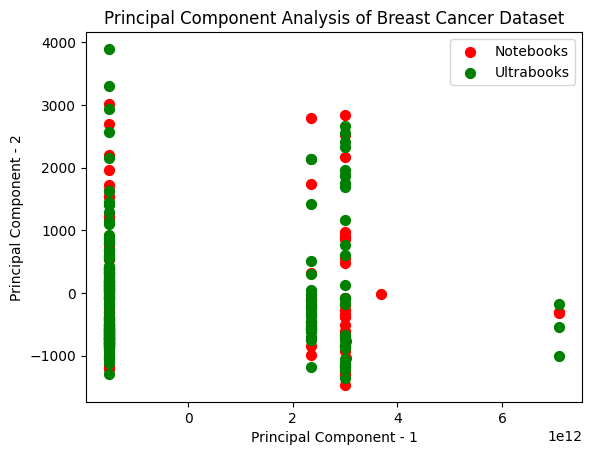

In [20]:
category = sorted(df_laptops_copy.category.unique())

plt.figure()
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Breast Cancer Dataset")
colors = ['r', 'g']
df_laptops_1_copy = df_laptops_copy.reset_index(drop=True)
for cat, color in zip(category,colors):
    indicesToKeep = df_laptops_1_copy['category'] == cat
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(["Notebooks", "Ultrabooks"])

### tSNE

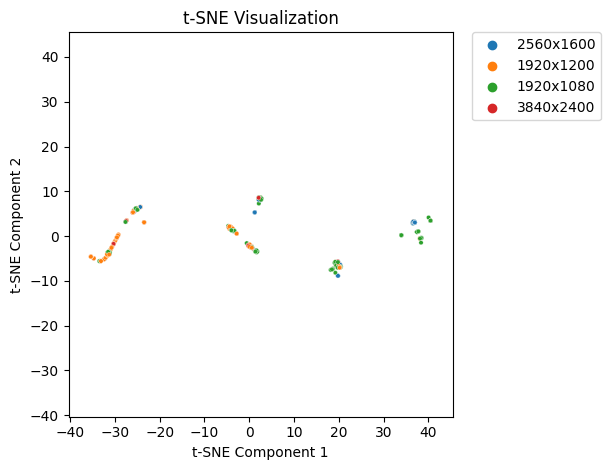

In [21]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': y})

fig, ax = plt.subplots(1)
scatter = sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=10)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Optionally, set labels and title
scatter.set_xlabel('t-SNE Component 1')
scatter.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Visualization')

plt.tight_layout()
plt.show()

## Task 2 K-means Clustering

In [22]:
import matplotlib.image as mpimg

from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [23]:
n_colors = [64, 32, 16, 8]

In [24]:
photo_image = mpimg.imread('photo.jpg')


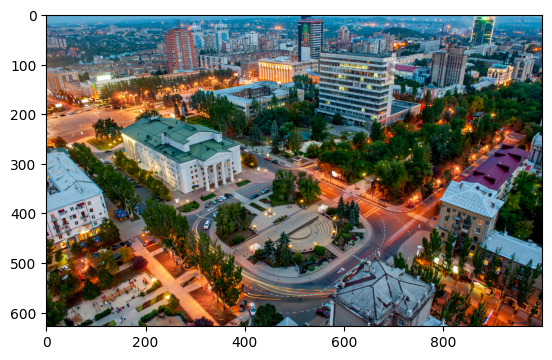

In [25]:
plt.imshow(photo_image)

In [26]:
photo_image = np.array(photo_image, dtype=np.float64) / 255

In [27]:
w, h, d = original_shape = tuple(photo_image.shape)
assert d == 3
image_array = np.reshape(photo_image, (w * h, d))

In [28]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

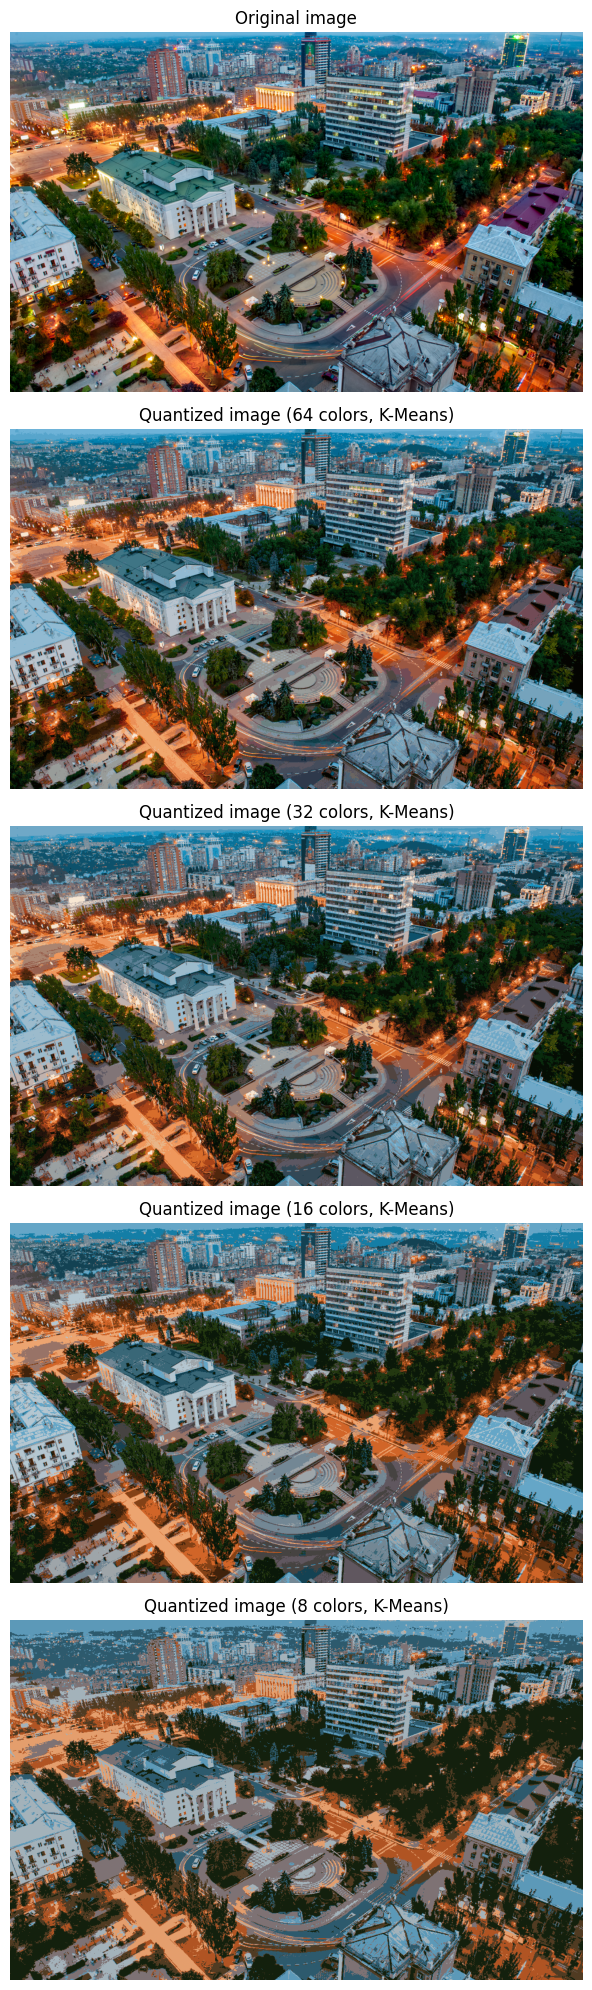

In [29]:
total_images = len(n_colors) + 1

# Set up the figure with appropriate size
plt.figure(figsize=(8, 4 * total_images))

# Plot the original image in the first row
plt.subplot(total_images, 1, 1) 
plt.axis("off")
plt.title("Original image")
plt.imshow(photo_image)

# Iterate through each value of n_colors and create quantized images
for idx, n_color in enumerate(n_colors, start=1):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_color, n_init="auto", random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)

    # Quantized image using K-Means in the subsequent rows
    plt.subplot(total_images, 1, idx + 1)  
    plt.axis("off")
    plt.title(f"Quantized image ({n_color} colors, K-Means)")
    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    plt.imshow(quantized_image)

plt.tight_layout()
plt.show()

## Task 3 Processing and classification of text data

In [30]:
df_news = pd.read_csv("google_news.csv")

In [31]:
df_news.head()

Title               Publisher  \
0  Chainlink (LINK) Falters, Hedera (HBAR) Wobble...       Analytics Insight   
1  Funds punished for owning too few Nvidia share...                   ZAWYA   
2  Crude oil prices stalled as hedge funds sold: ...                   ZAWYA   
3  Grayscale's Bitcoin Win Is Still Only Half the...               Bloomberg   
4  I'm a Home Shopping Editor, and These Are the ...  Better Homes & Gardens   

               DateTime                                               Link  \
0  2023-08-30T06:54:49Z  https://news.google.com/articles/CBMibGh0dHBzO...   
1  2023-08-30T07:15:59Z  https://news.google.com/articles/CBMigwFodHRwc...   
2  2023-08-30T07:31:31Z  https://news.google.com/articles/CBMibGh0dHBzO...   
3  2023-08-30T10:38:40Z  https://news.google.com/articles/CBMib2h0dHBzO...   
4  2023-08-30T11:00:00Z  https://news.google.com/articles/CBMiPWh0dHBzO...   

   Category  
0  Business  
1  Business  
2  Business  
3  Business  
4  Business

In [32]:
df_news.columns

Index(['Title', 'Publisher', 'DateTime', 'Link', 'Category'], dtype='object')

In [33]:
df_news = df_news.drop(columns=['Publisher', 'DateTime', 'Link']) #also possible to write list with axis=1 (columns)

In [34]:
df_news.head()

Title  Category
0  Chainlink (LINK) Falters, Hedera (HBAR) Wobble...  Business
1  Funds punished for owning too few Nvidia share...  Business
2  Crude oil prices stalled as hedge funds sold: ...  Business
3  Grayscale's Bitcoin Win Is Still Only Half the...  Business
4  I'm a Home Shopping Editor, and These Are the ...  Business

In [35]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51302 entries, 0 to 51301
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     51302 non-null  object
 1   Category  51302 non-null  object
dtypes: object(2)
memory usage: 801.7+ KB


In [36]:
from nltk.corpus import stopwords
import re

In [37]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
def format_text(text):
    no_special_symbols = re.sub(r'[^\w\s]', '', text) #to remove special characters
    no_special_symbols = re.sub(r'\s+', ' ', no_special_symbols).strip() #replace extra spaces with one space
    no_special_symbols_list = no_special_symbols.split(' ') #make list of words
    lowercase_list = [element.lower() for element in no_special_symbols_list] #to lowercase
    cleaned_without_stopwords = [word for word in lowercase_list if word not in stopwords.words('english')] #remove stopwords
    return cleaned_without_stopwords

In [39]:
df_news['Title'].apply(format_text)

0        [chainlink, link, falters, hedera, hbar, wobbl...
1        [funds, punished, owning, nvidia, shares, stun...
2        [crude, oil, prices, stalled, hedge, funds, so...
3          [grayscales, bitcoin, win, still, half, battle]
4        [im, home, shopping, editor, cantmiss, labor, ...
                               ...                        
51297    [slovakias, election, could, echo, ukraine, he...
51298      [things, know, nobel, prizes, washington, post]
51299    [brief, calm, protests, killing, 2, students, ...
51300    [one, safe, france, vows, action, bedbugs, swe...
51301    [slovakia, election, polls, open, knifeedge, v...
Name: Title, Length: 51302, dtype: object

In [40]:
from collections import Counter
Counter( df_news['Category'])

Counter({'Business': 6800,
         'Entertainment': 7003,
         'Headlines': 7155,
         'Health': 4877,
         'Science': 4361,
         'Sports': 7709,
         'Technology': 6822,
         'Worldwide': 6575})

In [41]:
from wordcloud import WordCloud

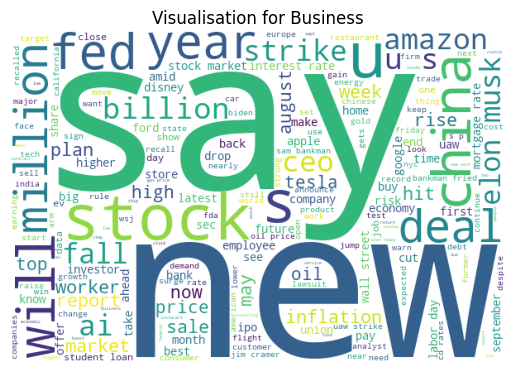

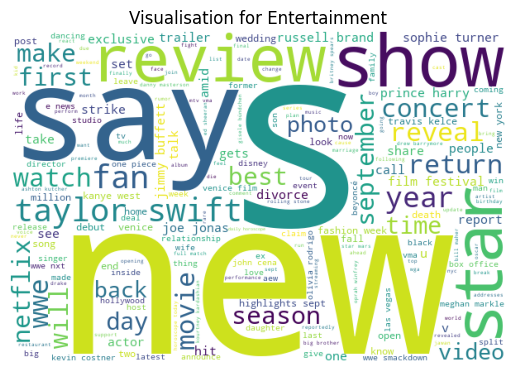

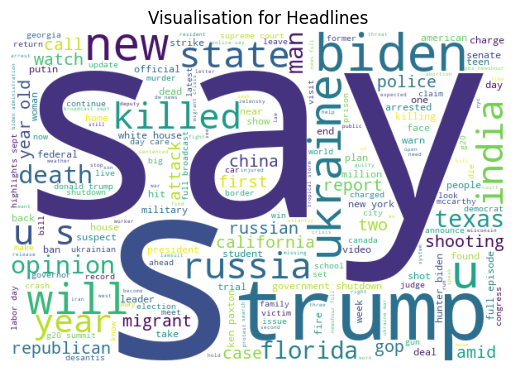

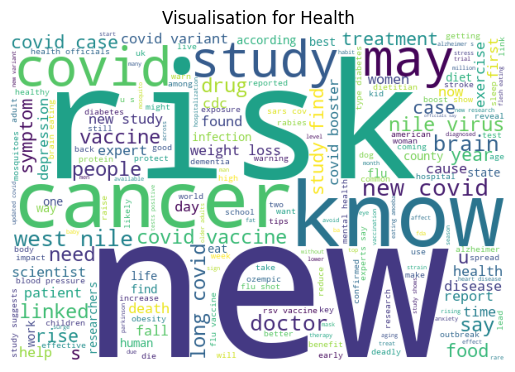

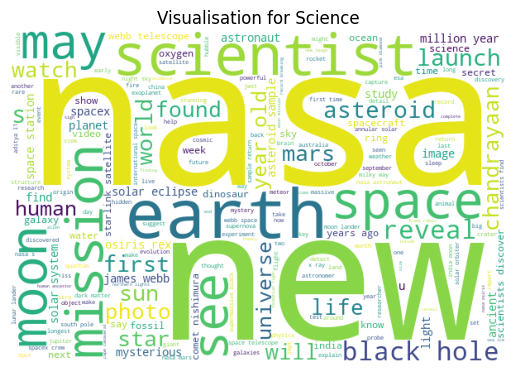

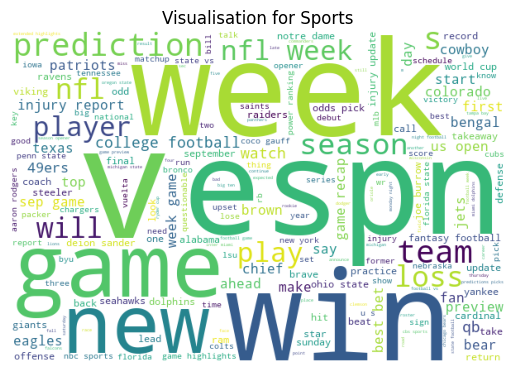

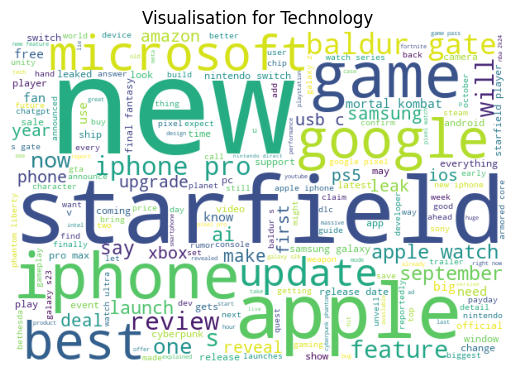

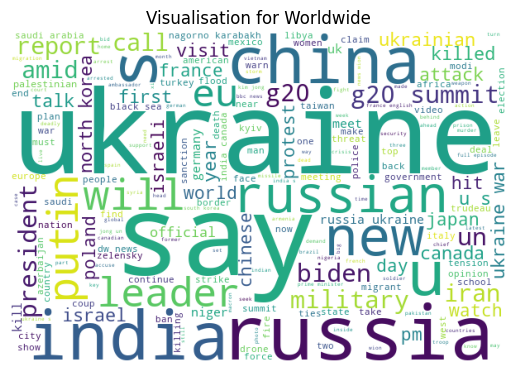

In [42]:
def visualize(label):
    text = ''
    for msg in df_news[df_news['Category'] == label]['Title']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.title(f"Visualisation for {label}")
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Business')
visualize('Entertainment')
visualize('Headlines')
visualize('Health')
visualize('Science')
visualize('Sports')
visualize('Technology')
visualize( 'Worldwide')

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer(analyzer=format_text)
title_bow = vectorizer.fit_transform(df_news['Title'])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(title_bow, df_news['Category'], test_size = 0.20, random_state = 44)

In [46]:
y_train.head()

31853        Sports
47502     Worldwide
15016     Headlines
30784        Sports
43001    Technology
Name: Category, dtype: object

In [47]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

               precision    recall  f1-score   support

     Business       0.93      0.89      0.91      5437
Entertainment       0.96      0.96      0.96      5636
    Headlines       0.87      0.73      0.79      5717
       Health       0.93      0.97      0.95      3930
      Science       0.93      0.96      0.95      3533
       Sports       0.96      0.98      0.97      6113
   Technology       0.96      0.96      0.96      5413
    Worldwide       0.79      0.90      0.84      5262

     accuracy                           0.92     41041
    macro avg       0.92      0.92      0.92     41041
 weighted avg       0.92      0.92      0.91     41041

Confusion Matrix: 
 [[4863   33  170   97   32   49  127   66]
 [  48 5393   64   23   13   31   51   13]
 [ 160   64 4162   58   49  122   10 1092]
 [  15   35   15 3813   21   10    7   14]
 [  14    5   14   58 3407    2   19   14]
 [  19   30   42    2    2 6004    5    9]
 [  70   31   16   14   44   20 5201   17]
 [  62   35  301